### Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


### Get Data

In [54]:
train = pd.read_csv("../../data/train.csv")
test = pd.read_csv("../../data/test.csv")

### Data Exploration

In [3]:
n_train = train.shape[0]
print("The train dataset has %d features and %d records." % (train.shape[1]-1, train.shape[0]))

print("The train dataset has %d records." % test.shape[0])

The train dataset has 80 features and 1460 records.
The train dataset has 1459 records.


In [12]:
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


#### Data Pre-processing
<ol>
    <li>Separating the dependent variable <code>SalePrice</code> from the <i>train</i> feature matrix.
    <li>Combining the <i>train</i> and <i>test</i> dataset.
</ol>

In [55]:
y_train = train['SalePrice']

dat = pd.concat([train.iloc[:,:-1], test])

print('The count of data types of the features of the combined dataset: \n\n', dat.dtypes.value_counts())

The count of data types of the features of the combined dataset: 

 object     43
int64      26
float64    11
dtype: int64


In [5]:
pd.set_option('display.max_columns', 100)
print('Summary Statistics for combined dataset columns with object datatype')
dat.describe(include = 'object')

Summary Statistics for combined dataset columns with object datatype


,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Heating,HeatingQC,CentralAir,Electrical,KitchenQual,Functional,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
count,2915,2919,198,2919,2919,2917,2919,2919,2919,2919,2919,2919,2919,2919,2919,2918,2918,2895,2919,2919,2919,2838,2837,2837,2840,2839,2919,2919,2919,2918,2918,2917,1499,2762,2760,2760,2760,2919,10,571,105,2918,2919
unique,5,2,2,4,4,2,5,3,25,9,8,5,8,6,8,15,16,4,4,5,6,4,4,4,6,6,6,5,2,5,4,7,5,6,3,5,5,3,3,4,4,9,6
top,RL,Pave,Grvl,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,Gable,CompShg,VinylSd,VinylSd,None,TA,TA,PConc,TA,TA,No,Unf,Unf,GasA,Ex,Y,SBrkr,TA,Typ,Gd,Attchd,Unf,TA,TA,Y,Ex,MnPrv,Shed,WD,Normal
freq,2265,2907,120,1859,2622,2916,2133,2778,443,2511,2889,2425,1471,2310,2876,1025,1014,1742,1798,2538,1308,1283,2606,1904,851,2493,2874,1493,2723,2671,1492,2717,744,1723,1230,2604,2654,2641,4,329,95,2525,2402


In [6]:
print('Summary Statistics for combined dataset columns with int64 datatype')
dat.describe(include = 'int64')

Summary Statistics for combined dataset columns with int64 datatype


,Id,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
count,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000
mean,1460.000000,57.137718,10168.114080,6.089072,5.564577,1971.312778,1984.264474,1159.581706,336.483727,4.694416,1500.759849,1.568003,0.380267,2.860226,1.044536,6.451524,0.597122,93.709832,47.486811,23.098321,2.602261,16.062350,2.251799,50.825968,6.213087,2007.792737
std,842.787043,42.517628,7886.996359,1.409947,1.113131,30.291442,20.894344,392.362079,428.701456,46.396825,506.051045,0.552969,0.502872,0.822693,0.214462,1.569379,0.646129,126.526589,67.575493,64.244246,25.188169,56.184365,35.663946,567.402211,2.714762,1.314964
min,1.000000,20.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000
25%,730.500000,20.000000,7478.000000,5.000000,5.000000,1953.500000,1965.000000,876.000000,0.000000,0.000000,1126.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,2007.000000
50%,1460.000000,50.000000,9453.000000,6.000000,5.000000,1973.000000,1993.000000,1082.000000,0.000000,0.000000,1444.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,0.000000,26.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000
75%,2189.500000,70.000000,11570.000000,7.000000,6.000000,2001.000000,2004.000000,1387.500000,704.000000,0.000000,1743.500000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,168.000000,70.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000
max,2919.000000,190.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,5095.000000,2065.000000,1064.000000,5642.000000,4.000000,2.000000,8.000000,3.000000,15.000000,4.000000,1424.000000,742.000000,1012.000000,508.000000,576.000000,800.000000,17000.000000,12.000000,2010.000000


In [7]:
print('Summary Statistics for combined dataset columns with float64 datatype')
dat.describe(include = 'float64')

Summary Statistics for combined dataset columns with float64 datatype


,LotFrontage,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,BsmtFullBath,BsmtHalfBath,GarageYrBlt,GarageCars,GarageArea
count,2433.000000,2896.000000,2918.000000,2918.000000,2918.000000,2918.000000,2917.000000,2917.000000,2760.000000,2918.000000,2918.000000
mean,69.305795,102.201312,441.423235,49.582248,560.772104,1051.777587,0.429894,0.061364,1978.113406,1.766621,472.874572
std,23.344905,179.334253,455.610826,169.205611,439.543659,440.766258,0.524736,0.245687,25.574285,0.761624,215.394815
min,21.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1895.000000,0.000000,0.000000
25%,59.000000,0.000000,0.000000,0.000000,220.000000,793.000000,0.000000,0.000000,1960.000000,1.000000,320.000000
50%,68.000000,0.000000,368.500000,0.000000,467.000000,989.500000,0.000000,0.000000,1979.000000,2.000000,480.000000
75%,80.000000,164.000000,733.000000,0.000000,805.500000,1302.000000,1.000000,0.000000,2002.000000,2.000000,576.000000
max,313.000000,1600.000000,5644.000000,1526.000000,2336.000000,6110.000000,3.000000,2.000000,2207.000000,5.000000,1488.000000


#### Data Exploration - contd.
Referring to the details in the <b>Data Description</b> file and comparing with the data types in various feature columns detailed above, there is a mismatch between what the data type is and what it should be. The following changes are made to the feature data types to align them with what is intended by the description:
<ol>
    <li> The datatype of the columns <code>MSSubClass, MSZoning, Street, Alley, LotShape, LandContour, Utilities, LotConfig, LandSlope, Neighborhood, Condition1, Condition2, BldgType, HouseStyle, OverallQual, OverallCond, RoofStyle, RoofMatl, Exterior1st, Exterior2nd, MasVnrType, ExterQual, ExterCond, Foundation, BsmtQual, BsmtCond, BsmtExposure, BsmtFinType1, BsmtFinType2, Heating, HeatingQC, CentralAir, Electrical, KitchenQual, Functional, FireplaceQu, GarageType, GarageFinish, GarageQual, GarageCond, PavedDrive, PoolQC, Fence, MiscFeature, SaleType, SaleCondition</code> should be of type <b>category</b>.
    <li> The datatype of the columns <code>YearBuilt, YearRemodAdd, BsmtFullBath, BsmtHalfBath, FullBath, HalfBath, Bedroom, Kitchen, TotRmsAbvGrd, Fireplaces, GarageYrBlt, GarageCars, MoSold, YrSold</code> should be of type <b>int64</b>.
    <li> The datatype of the columns <code>LotFrontage, LotArea, MasVnrArea, BsmtFinSF1, BsmtFinSF2, BsmtUnfSF, TotalBsmtSF, 1stFlrSF, 2ndFlrSF, LowQualFinSF, GrLivArea, GarageArea, WoodDeckSF, OpenPorchSF, EnclosedPorch, 3SsnPorch, ScreenPorch, PoolArea, MiscVal</code> should be of type <b>float64</b>.
</ol>
For each of these three sets of features we ascertain the details of the missing values.

In [56]:
'''int_64_feats = ['YearBuilt', 'YearRemodAdd', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'Bedroom', 
                'Kitchen', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'MoSold', 'YrSold']
dat[int_64_feats].isna().sum()

dat[['Kitchen', 'Bedroom']].head()
dat[['KitchenAbvGr', 'BedroomAbvGr']].head()

# It turns out that there is a mismatch between the column names in the Data Description file and the column names
# in the dataset. 'Kitchen' in the Data Description file refers to 'KitchenAbvGr' in the dataset; similarly 
# Bedroom' refers to 'BedroomAbvGr'''

int_64_feats = ['YearBuilt', 'YearRemodAdd', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 
                'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 
                'MoSold', 'YrSold']
print('\nThe summary of missing values in features that should be of type int64:\n\n',
      dat[int_64_feats].isna().sum())

float_64_feats = ['LotFrontage', 'LotArea', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 
                  '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 
                  'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal']
print('\nThe summary of missing values in features that should be of type float64:\n\n',
      dat[float_64_feats].isna().sum())

cat_feats = ['MSSubClass', 'MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 
             'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'OverallQual', 
             'OverallCond', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 
             'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 
             'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 
             'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 
             'MiscFeature', 'SaleType', 'SaleCondition']
print('\nThe summary of missing values in features that should be of type category:\n\n',
      dat[cat_feats].isna().sum())



The summary of missing values in features that should be of type int64:

 YearBuilt         0
YearRemodAdd      0
BsmtFullBath      2
BsmtHalfBath      2
FullBath          0
HalfBath          0
BedroomAbvGr      0
KitchenAbvGr      0
TotRmsAbvGrd      0
Fireplaces        0
GarageYrBlt     159
GarageCars        1
MoSold            0
YrSold            0
dtype: int64

The summary of missing values in features that should be of type float64:

 LotFrontage      486
LotArea            0
MasVnrArea        23
BsmtFinSF1         1
BsmtFinSF2         1
BsmtUnfSF          1
TotalBsmtSF        1
1stFlrSF           0
2ndFlrSF           0
LowQualFinSF       0
GrLivArea          0
GarageArea         1
WoodDeckSF         0
OpenPorchSF        0
EnclosedPorch      0
3SsnPorch          0
ScreenPorch        0
PoolArea           0
MiscVal            0
dtype: int64

The summary of missing values in features that should be of type category:

 MSSubClass          0
MSZoning            4
Street              0

From the <b>Data Description</b> file we note that the features <code>Alley, BsmtQual, BsmtCond, BsmtExposure, BsmtFinType1, BsmtFinType2, FireplaceQu, GarageType, GarageFinish, GarageQual, GarageCond, PoolQC, Alley, MiscFeature</code> can take value <b>NA</b> that indicates absence of the relevant feature. However, <b>NA</b> has a specific meaning when used in analysis and hence for all records that report <b>NA</b> in any of the features mentioned above, we would want rewrite <b>NA</b> to <b>ABSNT</b> to better convey the meaning. Similarly, <code>MasVnrType</code> can take value <b>None</b> which we rewrite to <b>ABSNT</b>. Finally, <code>GarageYrBlt</code> can take value <b>NA</b> which we can rewrite to <b>0</b>, if the garage is absent.  

However, care needs to be taken that a genuine <b>NA</b> is not replaced. To that end, we use obvious relationship between features to deduce a genuine <b>NA</b> as follows:
<ul>
    <li> For <code>BsmtQual, BsmtCond, BsmtExposure, BsmtFinType1, BsmtFinType2</code> we ascertain if the corresponding <code>TotalBsmtSF</code> = 0, and if it is, then for the respective feature we replace the <b>NA</b> by <b>ABSNT</b>.
    <li> For <code>FireplaceQu</code> we ascertain if the corresponding <code>Fireplaces</code> = 0, and if it is, then we replace the <b>NA</b> by <b>ABSNT</b>.
    <li> For <code>GarageType, GarageFinish, GarageQual, GarageCond, GarageYrBlt</code> we ascertain if the corresponding <code>GarageArea</code> = 0, and if it is, then for the respective feature we replace the <b>NA</b> by <b>ABSNT</b>.
    <li> For <code>PoolQC</code> we ascertain if the corresponding <code>PoolArea</code> = 0, and if it is then we replace the <b>NA</b> by <b>ABSNT</b>.
    <li> For <code>MiscFeature</code> we ascertain if the corresponding <code>MiscVal</code> = 0, and if it is then we replace the <b>NA</b> by <b>ABSNT</b>.
    <li> For <code>MasVnrType</code> we ascertain if the corresponding <code>MasVnrArea</code> = 0, and if it is, then we replace the <b>NA</b> by <b>ABSNT</b>.
    <li> For <code>GarageYrBlt</code> we ascertain if the corresponding <code>GarageArea</code> = 0, and if it is, then we replace the <b>NA</b> by <b>0</b>.
    <li> Finally for features, <code>Alley, Fence</code>, because we can't find an obvious relationship with any other features we replace all <b>NA</b> with <b>ABSNT</b>.

We once again, for each of these three sets of features, we ascertain the details of the missing values.

In [57]:
NA_feats = [['BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2'],['FireplaceQu'], 
            ['GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'GarageYrBlt'], ['PoolQC'], 
            ['MiscFeature'], ['MasVnrType']]
val_feats = ['TotalBsmtSF', 'Fireplaces', 'GarageArea', 'PoolArea', 'MiscVal', 'MasVnrArea']

for i in range(len(NA_feats)):
    for j in range(len(NA_feats[i])):
        dat.loc[(dat.loc[:, NA_feats[i][j]].isna()) & (dat.loc[:, val_feats[i]] == 0), [NA_feats[i][j]]] = 'ABSNT'
        
dat.loc[(dat.loc[:, 'MasVnrArea'] == 0) & (dat.loc[:, 'MasVnrType'] == 'None'), ['MasVnrType']] = 'ABSNT'

dat.loc[dat.loc[:, 'Alley'].isna(), 'Alley'] = 'ABSNT'
dat.loc[dat.loc[:, 'Fence'].isna(), 'Fence'] = 'ABSNT'

print('\nThe summary of missing values in features that should be of type int64:\n\n',
      dat[int_64_feats].isna().sum())
print('\nThe summary of missing values in features that should be of type float64:\n\n',
      dat[float_64_feats].isna().sum())
print('\nThe summary of missing values in features that should be of type category:\n\n',
      dat[cat_feats].isna().sum())


The summary of missing values in features that should be of type int64:

 YearBuilt       0
YearRemodAdd    0
BsmtFullBath    2
BsmtHalfBath    2
FullBath        0
HalfBath        0
BedroomAbvGr    0
KitchenAbvGr    0
TotRmsAbvGrd    0
Fireplaces      0
GarageYrBlt     2
GarageCars      1
MoSold          0
YrSold          0
dtype: int64

The summary of missing values in features that should be of type float64:

 LotFrontage      486
LotArea            0
MasVnrArea        23
BsmtFinSF1         1
BsmtFinSF2         1
BsmtUnfSF          1
TotalBsmtSF        1
1stFlrSF           0
2ndFlrSF           0
LowQualFinSF       0
GrLivArea          0
GarageArea         1
WoodDeckSF         0
OpenPorchSF        0
EnclosedPorch      0
3SsnPorch          0
ScreenPorch        0
PoolArea           0
MiscVal            0
dtype: int64

The summary of missing values in features that should be of type category:

 MSSubClass        0
MSZoning          4
Street            0
Alley             0
LotShape     

We now have the better picture of the missing values in the various features. Listing the details of the missing values per datatype per feature:
<ul>
    <ul>Datatype: <b>int64</b>
        <ul>
            <li><code>BsmtFullBath</code> - 2
            <li><code>BsmtHalfBath</code> - 2
            <li><code>GarageYrBlt</code> - 2
            <li><code>GarageCars</code> - 1
         </ul>
    </ul>
    <ul>Datatype: <b>float64</b>
        <ul>
            <li><code>LotFrontage</code> - 486
            <li><code>MasVnrArea</code> - 23
            <li><code>BsmtFinSF1</code> - 1
            <li><code>BsmtFinSF2</code> - 1
            <li><code>BsmtUnfSF</code> - 1
            <li><code>TotalBsmtSF</code> - 1
            <li><code>GarageArea</code> - 1
         </ul>
    </ul>
    <ul>Datatype: <b>category</b>
        <ul>
            <li><code>MSZoning</code> - 4
            <li><code>Utilities</code> - 2
            <li><code>Exterior1st</code> - 1
            <li><code>Exterior2nd</code> - 1
            <li><code>MasVnrType</code> - 24
            <li><code>BsmtQual</code> - 3
            <li><code>BsmtCond</code> - 4
            <li><code>BsmtExposure</code> - 4
            <li><code>BsmtFinType1</code> - 1
            <li><code>BsmtFinType2</code> - 2
            <li><code>Electrical</code> - 1
            <li><code>KitchenQual</code> - 1
            <li><code>Functional</code> - 2
            <li><code>GarageFinish</code> - 2
            <li><code>GarageQual</code> - 2
            <li><code>GarageCond</code> - 2
            <li><code>PoolQC</code> - 3
            <li><code>MiscFeature</code> - 2
            <li><code>SaleType</code> - 1
         </ul>
     </ul>
</ul>

We focus on  features of numerical type with relatively large number of missing values to discover strategies to impute the missing values. From the summary statistics we notice that <code>MasVnrArea</code> is likely to have a skewed distribution. We confirm this insight to decide on the strategy to impute missing value. We derive the frequency table for the different values <code>MasVnrArea</code> can take.

We note that similar number of records report missing values for <code>MasVnrArea</code> and <code>MasVnrType</code>. Couple this with the fact that we know that these two features are related we also investigate if the same records report <b>NA</b> values for <code>MasVnrArea</code> and <code>MasVnrType</code>.

In [ ]:
feats = [BsmtFullBath, BsmtHalfBath, GarageCars, MSZoning, Utilities, Exterior1st, Exterior2nd, BsmtQual, 
         BsmtCond, BsmtExposure, BsmtFinType1, BsmtFinType2, Electrical, KitchenQual, Functional, GarageFinish, 
         GarageQual, 
         GarageCond, PoolQC, MiscFeature, SaleType ]

In [58]:
print('The frequency table for different values MasVnrArea can take:\n\n',dat.loc[:, 'MasVnrArea'].value_counts())

print('\nNumber of records that report NA values for both MasVnrArea and MasVnrType:\n\n', 
      dat.loc[(dat.loc[:, 'MasVnrArea'].isna()) & (dat.loc[:, 'MasVnrType'].isna()), 
              ['MasVnrArea', 'MasVnrType']])

The frequency table for different values MasVnrArea can take:

 0.0      1738
120.0      15
176.0      13
200.0      13
216.0      12
         ... 
664.0       1
247.0       1
550.0       1
137.0       1
572.0       1
Name: MasVnrArea, Length: 444, dtype: int64

Number of records that report NA values for both MasVnrArea and MasVnrType:

       MasVnrArea MasVnrType
234          NaN        NaN
529          NaN        NaN
650          NaN        NaN
936          NaN        NaN
973          NaN        NaN
977          NaN        NaN
1243         NaN        NaN
1278         NaN        NaN
231          NaN        NaN
246          NaN        NaN
422          NaN        NaN
532          NaN        NaN
544          NaN        NaN
581          NaN        NaN
851          NaN        NaN
865          NaN        NaN
880          NaN        NaN
889          NaN        NaN
908          NaN        NaN
1132         NaN        NaN
1197         NaN        NaN
1226         NaN        NaN
1402         Na

There is a definite and significant skew in the distribution of values <code>MasVnrArea</code> can take with almost 60% records reporting 0. We will use the fact that there is a significant skey and a mode value of 0 for the distribution to impute the value 0 for all records reporting <b>NA</b> for <code>MasVnrArea</code>.

For a number of records we see that both <code>MasVnrArea</code> and <code>MasVnrType</code> report <b>NA</b> values. Therefore for those records for which we impute 0 to <code>MasVnrArea</code>, we impute <b>ABSNT</b> to <code>MasVnrType</code>.

In [60]:
dat.loc[dat.loc[:, 'MasVnrArea'].isna(), ['MasVnrArea', 'MasVnrType']] = [0, 'ABSNT']

From the <b>Data Description</b> it is not immediately clear what other features <code>LotFrontage</code> might be related to. Using domain knowledge, we make the assumption that the features - <code>MSZoning, LotArea, LotShape, Street, LandContour, LotConfig, Neighborhood</code> are like to affect value of <code>LotFrontage</code>. We set up a <i>Linear Regression</i> model to test this hypothesis.

In [213]:
feats = ['LotFrontage','MSZoning', 'LotArea', 'LotShape', 'Street', 'LandContour', 'LotConfig', 'Neighborhood']

lf_train_x = dat.loc[:, feats].dropna()
lf_train_x = pd.get_dummies(lf_train_x)

lf_train_y = lf_train_x.loc[:, 'LotFrontage']
lf_train_x = lf_train_x[lf_train_x.columns.difference(['LotFrontage'])]

from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(lf_train_x, lf_train_y, random_state = 1970)

from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)
model.score(X_val, y_val).round(5)

0.54829

The low R-squared value rejects the hypothesis that <code>LotFrontage</code> is corelated with other features.

We look at the histogram of the <code>LotFrontage</code> values to understand its distribution and hence decide on the missing value imputation startegy.

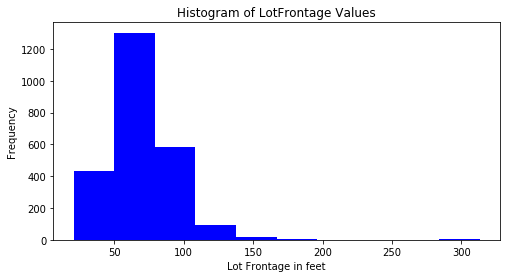

In [211]:
plt.figure(figsize = (8,4))

plt.hist(dat.loc[:,'LotFrontage'].dropna(), histtype = 'stepfilled', color = 'blue')
plt.xlabel('Lot Frontage in feet')
plt.ylabel('Frequency')
plt.title('Histogram of LotFrontage Values')

plt.show()

Ignoring the outliers, the value for <code>LotFrontage</code> follows a near normal distribution and hence we assign the mean value to the rows with missing value.

In [215]:
dat.loc[:, 'LotFrontage'].fillna(value = dat.loc[:, 'LotFrontage'].dropna().mean(), inplace = True)

In [98]:
#dat.loc[dat.loc[:, 'MasVnrType'].isna(), ['Id', 'MasVnrType', 'MasVnrArea']]

dat.loc[:,['YearBuilt', 'YearRemodAdd', 'GarageYrBlt']].head(25)

,YearBuilt,YearRemodAdd,GarageYrBlt
0,2003,2003,2003
1,1976,1976,1976
2,2001,2002,2001
3,1915,1970,1998
4,2000,2000,2000
5,1993,1995,1993
6,2004,2005,2004
7,1973,1973,1973
8,1931,1950,1931
9,1939,1950,1939
